# ***                 CAR PRICE PREDICTION WITH MACHINE LEARNING***

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading

In [ ]:

def load_data(file_path):
    df = pd.read_csv('car_data.csv')
    return df

# Step 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       

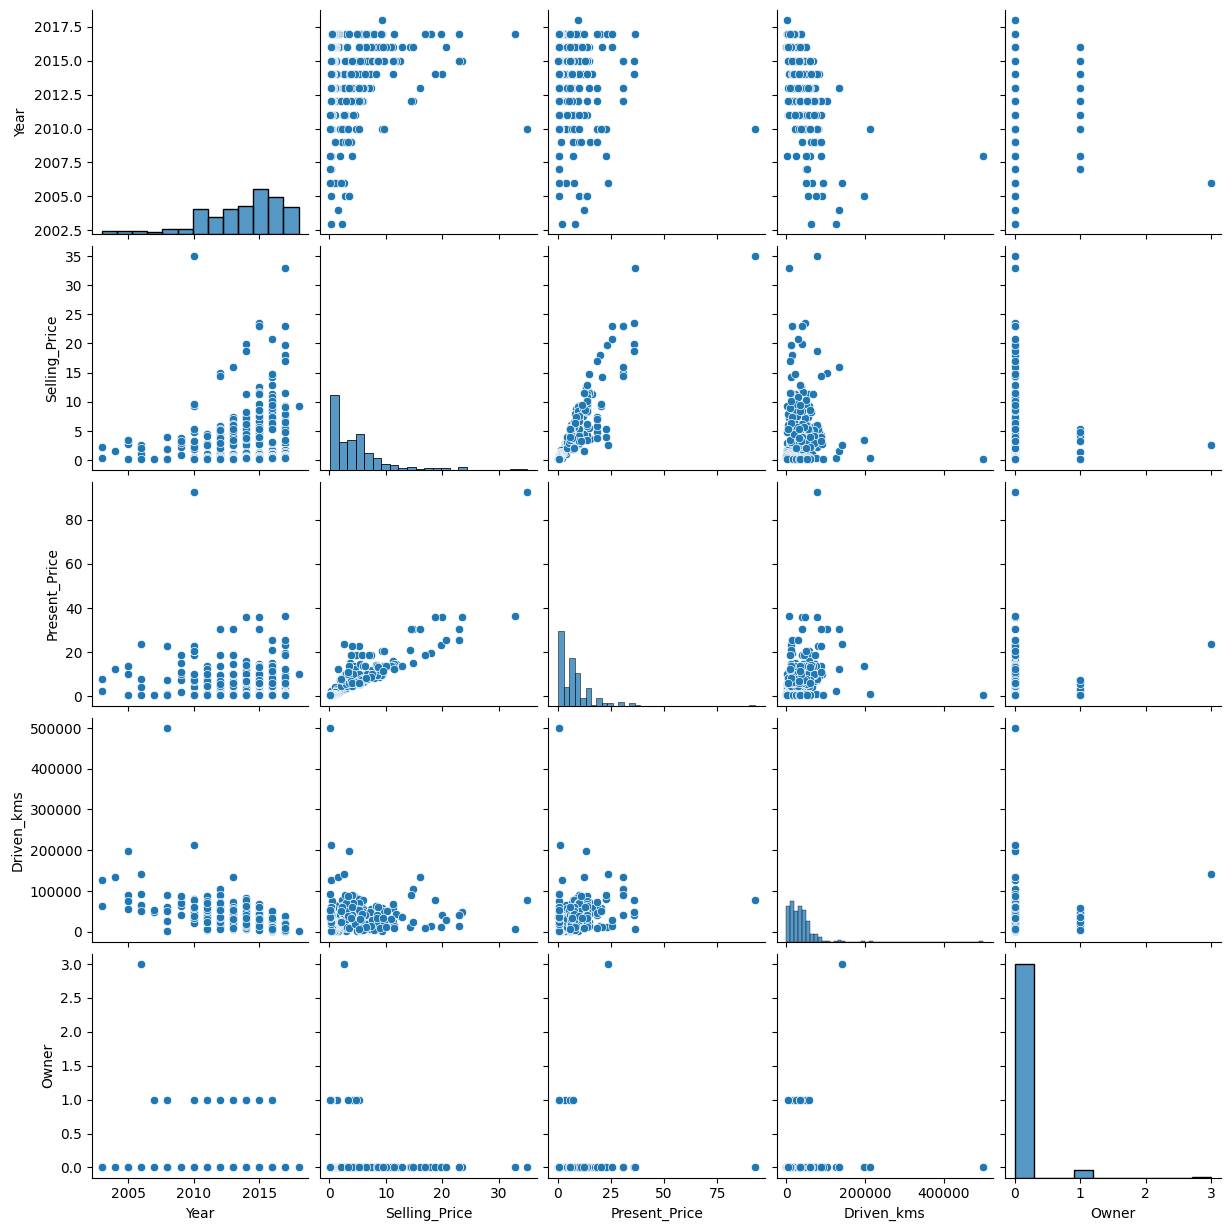

In [ ]:

print(df.info())
print(df.describe())
print(df.head())

# Visualizing data (optional)
sns.pairplot(df)
plt.show()


# Step 3: Data Preprocessing

In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Define preprocessing for numeric columns (impute missing values)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (impute missing values and apply one-hot encoding)
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Model Definition

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR()
}

# Step 5: Model Training and Evaluation

In [ ]:
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'R2': r2}
    # print(f'{model_name} - RMSE: {rmse}, R2: {r2}')


# Step 6: Result Visualization

                            RMSE        R2
Linear Regression       1.512557  0.900683
Random Forest           0.878097  0.966528
Gradient Boosting       0.948594  0.960937
Support Vector Machine  2.072019  0.813625


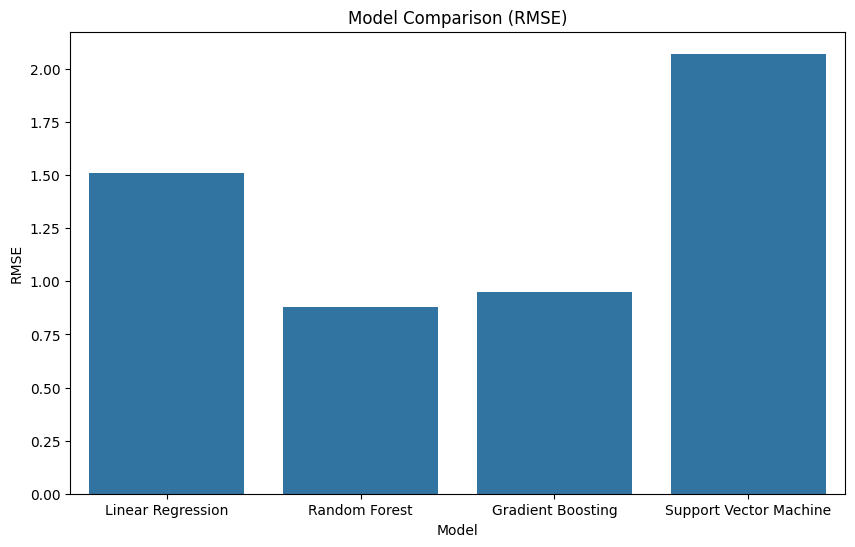

In [ ]:

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df)
plt.title('Model Comparison (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Useing Supoort Vector Machine

Support Vector Machine (SVM) - RMSE: 2.0720193079207063, R2: 0.8136246984045661


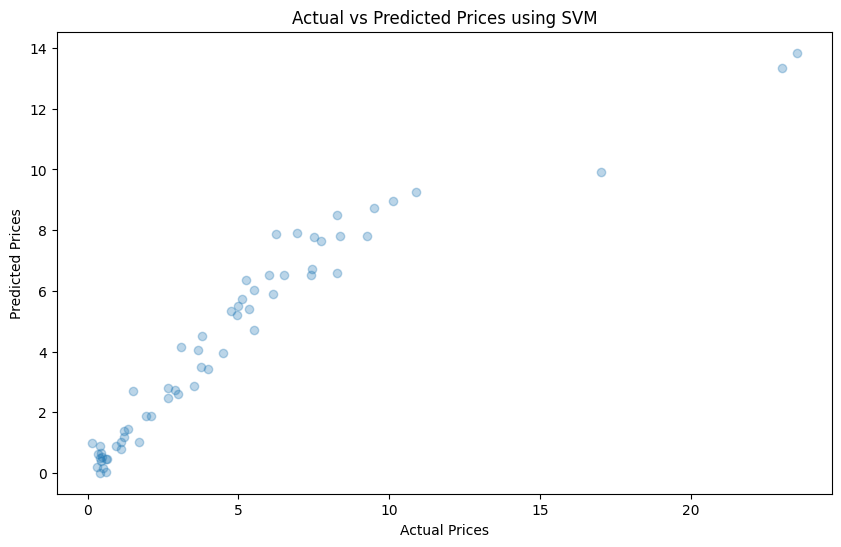

In [ ]:
# Define the SVM model
svm_model = SVR()

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', svm_model)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the final output using the SVM algorithm
print(f'Support Vector Machine (SVM) - RMSE: {rmse}, R2: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SVM")
plt.show()